<a href="https://colab.research.google.com/github/spinedace/AlgorithmsUN2023II/blob/main/Lab7/spinedace_Grupo21_Gale_Shapley_and_Irving_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Name:** Santiago Alfonso Pineda Ceballos# **UN Id:** spinedace# L**ist number:** 22# **Group :** 21

Gale-Shapley Algorithm

In [12]:
#Codigo adaptado de https://www.geeksforgeeks.org/stable-marriage-problem/

from PIL import Image as PillowImage, ImageDraw, ImageFont

iteracionesTotales=[]

# Python3 program for stable marriage problem



# This function returns true if
# woman 'w' prefers man 'm1' over man 'm'
def wPrefersM1OverM(prefer, w, m, m1):

    # Check if w prefers m over her
    # current engagement m1
    for i in range(N):

        # If m1 comes before m in list of w,
        # then w prefers her current engagement,
        # don't do anything
        if (prefer[w][i] == m1):
            return True

        # If m comes before m1 in w's list,
        # then free her current engagement
        # and engage her with m
        if (prefer[w][i] == m):
            return False

# Prints stable matching for N boys and N girls.
# Boys are numbered as 0 to N-1.
# Girls are numbered as N to 2N-1.
def stableMarriage(prefer, imprimir, gif):

    numIteraciones = 0


    # Stores partner of women. This is our output
    # array that stores passing information.
    # The value of wPartner[i] indicates the partner
    # assigned to woman N+i. Note that the woman numbers
    # between N and 2*N-1. The value -1 indicates
    # that (N+i)'th woman is free
    wPartner = [-1 for i in range(N)]

    # An array to store availability of men.
    # If mFree[i] is false, then man 'i' is free,
    # otherwise engaged.
    mFree = [False for i in range(N)]

    freeCount = N

    # While there are free men
    while (freeCount > 0):

        numIteraciones+=1

        # Pick the first free man (we could pick any)
        m = 0
        while (m < N):
            if (mFree[m] == False):
                break
            m += 1

        # One by one go to all women according to
        # m's preferences. Here m is the picked free man
        i = 0
        while i < N and mFree[m] == False:
            w = prefer[m][i]

            # The woman of preference is free,
            # w and m become partners (Note that
            # the partnership maybe changed later).
            # So we can say they are engaged not married
            if (wPartner[w - N] == -1):
                wPartner[w - N] = m
                mFree[m] = True
                freeCount -= 1

            else:

                # If w is not free
                # Find current engagement of w
                m1 = wPartner[w - N]

                # If w prefers m over her current engagement m1,
                # then break the engagement between w and m1 and
                # engage m with w.
                if (wPrefersM1OverM(prefer, w, m, m1) == False):
                    wPartner[w - N] = m
                    mFree[m] = True
                    mFree[m1] = False
            i += 1
        if gif:
          matriz_cuadricula = [[0] * N for _ in range(N)]
          crear_imagen(matriz_cuadricula, wPartner, mFree,numIteraciones)





            # End of Else
        # End of the for loop that goes
        # to all women in m's list
    # End of main while loop

    iteracionesTotales.append(numIteraciones)

    # Print solution
    if imprimir:
      print("Woman ", " Man")
      for i in range(N):
          print(i + N, "\t", wPartner[i])

      print("Numero de iteraciones: ", numIteraciones, "\n")


    if gif:
      images = []
      for n in range(1,numIteraciones+1):
          frame = PillowImage.open(str(n)+".gif")
          images.append(frame)

      images[0].save('animacion.gif',
                save_all=True,
                append_images=images[1:],
                duration=500,
                loop=0)





# This code is contributed by Mohit Kumar


In [11]:
import random

def peorCaso(N):
    prefer = []

    sublist = list(range(N, 2*N))
    prefer.append(list(sublist))
    sublist.pop(N-1)
    for n in range(N-1):
        sublist.extend([sublist.pop(0),2*N-1])
        prefer.append(list(sublist))
        sublist.pop(N-1)


    sublist = list(range(N))
    for n in range(N,2*N):
        sublist.append(sublist.pop(0))
        prefer.append(list(sublist))


    return prefer

def mejorCaso(N):
    prefer = []

    sublist = list(range(N, 2*N))
    prefer.append(list(sublist))
    for n in range(N,2*N-1):
        sublist.append(sublist.pop(0))
        prefer.append(list(sublist))


    sublist = list(range(N))
    prefer.append(list(sublist))
    for n in range(N-1):
        sublist.append(sublist.pop(0))
        prefer.append(list(sublist))


    return prefer


def casoAleatorio(N):
    prefer = []

    sublist = list(range(N, 2*N))
    for n in range(N,2*N):
        random.shuffle(sublist)
        prefer.append(list(sublist))

    sublist = list(range(N))
    for n in range(N):
        random.shuffle(sublist)
        prefer.append(list(sublist))



    return prefer

Irving Algorithm

In [22]:
#Codigo sacado de https://github.com/szhangbi/Works-on-Irving-s-algorithm/blob/master/Irving's%20algorithm.py

import numpy as np
# import pandas as pd
import random
# import copy
import matplotlib.pyplot as plt
# import csv

ENABLE_PRINT = 0
DETAILED_ENABLE_PRINT=0
#convert the preference matrix into ranking matrix
def get_ranking(preference):
    ranking = np.zeros(preference.shape,dtype=int)
    for row in range(0,len(preference[:,0])):
        for col in range(0,len(preference[0,:])):
            ranking[row,col]=list(preference[row,:]).index(col)
    return ranking


def phaseI_reduction(preference, leftmost, rightmost, ranking):
    ## leftmost and rightmost is updated here
    set_proposed_to=set() ## this set contains the players who has been proposed to and holds someone
    for person in range(0,len((preference[0,:]))):
        proposer = person
        while True:
            next_choice = preference[proposer,leftmost[proposer]]
            current = preference[next_choice,rightmost[next_choice]]

            while ranking[next_choice,proposer]> ranking[next_choice,current]:
                ## proposer proposed to his next choice but being rejected
                if ENABLE_PRINT and DETAILED_ENABLE_PRINT: print("player", proposer+1, "proposed to", next_choice+1, "; ", next_choice+1, "rejects", proposer+1 )
                leftmost[proposer] = leftmost[proposer] + 1 ##proposer's preference list got reduced by 1 from the left
                next_choice = preference[proposer, leftmost[proposer]]
                current = preference[next_choice, rightmost[next_choice]]

            ## proposer being accepted by his next choice and next choice rejected his current partner
            if current!= next_choice: ##if next choice currently holds somebody
                if ENABLE_PRINT and DETAILED_ENABLE_PRINT: print("player", proposer + 1, "proposed to", next_choice + 1,"; ",next_choice + 1, "rejects", current + 1, " and holds", proposer+1 )
                leftmost[current]=leftmost[current]+1
            else: ##if next choice currently holds no body
                if ENABLE_PRINT and DETAILED_ENABLE_PRINT: print("player", proposer + 1, "proposed to", next_choice+1, "; ", next_choice+1, "holds", proposer+1)

            rightmost[next_choice] = ranking[next_choice, proposer] ##next choice's preference's list got reduced, rightmost is proposer now

            if not (next_choice in set_proposed_to): ##if no one is rejected <=> next choice has not been proposed before proposer proposed
                break
            proposer = current ##the one who being rejected is the next proposer
        set_proposed_to.add(next_choice)

    soln_possible = not (proposer==next_choice)
    ##Claim1: if there is a player i who is rejected by all, then he must be the last proposer in the loop
    ##Proof: bc if someone who has not proposed anyone, then there must be at least 1 person besides player i who holds nobody
    ##This fact is used to decide whether the solution exists or not

    #if soln_possible:
    if ENABLE_PRINT:  print("The table after phase-I execution is:")
    if ENABLE_PRINT:  friendly_print_current_table(preference, leftmost, rightmost)
    return soln_possible, leftmost, rightmost

def get_all_unmatched(leftmost, rightmost):
    unmatched_players = []
    for person in range(0, len(leftmost)):
        if leftmost[person] != rightmost[person]:
            if ENABLE_PRINT and DETAILED_ENABLE_PRINT: print(person + 1, "is unmatched")
            unmatched_players.append(person)
    return unmatched_players


def update_second2(person,preference, second, leftmost, rightmost, ranking):
    second[person]=leftmost[person]+1 #before updation, second is simply leftmost +1
    pos_in_list = second[person]
    while True:  # a sophisticated way to update the second choice, as some person between leftmost and rightmost might be dropped as well
        next_choice = preference[person, pos_in_list]
        pos_in_list += 1
        if ranking[next_choice, person] <= rightmost[next_choice]:  # check whether person is still in next_choice's reduced list <=> next_choice is still in his list
            second[person] = pos_in_list -1
            return next_choice, second


##Claim2: if a person whose reduced list contains only one person, he shall not appear in the cycle?
##Proof: Assume person i's list only contains one person j, -> j holds i's proposal after the reduction
# if there is l behind i in j's list, he must be deleted from i's list
# if there is k before i in j's list, then j's proposal must be accepted by someone a other than i, a's proposal must be accepted by someone b other than i,j,
#   b's proposal must be accepted by someone c other than a,i,j ... since there is only finite players, contradiction
#->i is the only person in j's reduced list -> i,j won't be found by find_unmatched and won't be someone's last choice or second choice

##Claim3: if a person whose reduced list contains more than one person, he must appear in the cycle?
##Proof: False. Duplicate the preference matrix in the paper with each number +6, and put the last six person at the end of the list of the first six person,
# and put the first six person at the end of the list of the last six person


##This fact means that we only need to initialize cycle once and loop to reduce the element of it


def seek_cycle2(preference, second,  first_unmatched, leftmost, rightmost, ranking):
    #tail= set()
    #print("I am in seek_cycle2")
    cycle =[]
    posn_in_cycle = 0
    person = first_unmatched
    if ENABLE_PRINT and DETAILED_ENABLE_PRINT: print("p_",posn_in_cycle+1,":",person+1)

    while not (person in cycle): ##loop until the first repeat
        cycle.append(person)
        posn_in_cycle+=1
        next_choice, second = update_second2(person,preference, second, leftmost, rightmost, ranking)
        if ENABLE_PRINT and DETAILED_ENABLE_PRINT: print("q_",posn_in_cycle,":",next_choice+1)
        person = preference[next_choice,rightmost[next_choice]]
        if ENABLE_PRINT and DETAILED_ENABLE_PRINT: print("p_",posn_in_cycle+1,":",person+1)
    #after this loop, person is the one who repeats first

    last_in_cycle= posn_in_cycle-1 #position of the last one in cycle in the "cycle" list
    #tail = set(cycle) #using the set object in Python, we don't need cycle_set
    while True: #this is used to find the head of the cycle and its position in the "cycle" list
        posn_in_cycle = posn_in_cycle - 1
        #tail = tail.remove(cycle[posn_in_cycle])
        if cycle[posn_in_cycle]==person: #loop until we get the person who repeat first
            first_in_cycle = posn_in_cycle
            break
    #print("!!!",first_in_cycle,last_in_cycle)
    #print("I am out of seek_cycle2 now")
    #friendly_print_rotation(cycle, first_in_cycle, last_in_cycle, preference, leftmost, second)
    return first_in_cycle, last_in_cycle, cycle, second



def phaseII_reduction2(preference, first_in_cycle, last_in_cycle, second, leftmost, rightmost,  soln_possible, cycle):
    #print("I am in phase ii reduction2")
    #print("input is:")
    #print([ leftmost, rightmost, second])
    for rank in range(first_in_cycle, last_in_cycle+1):
        proposer = cycle[rank]
        leftmost[proposer] = second[proposer]
        second[proposer] = leftmost[proposer]+1 #it is mentioned that proper initialization is unnecessary
        next_choice = preference[proposer,leftmost[proposer]]
        if ENABLE_PRINT and DETAILED_ENABLE_PRINT: print(proposer+1, "proposed to his second choice in the reduced list:", next_choice+1, ";", next_choice+1,"accepted ", proposer+1, "and rejected", preference[next_choice,rightmost[next_choice]]+1 )
        rightmost[next_choice] = get_ranking(preference)[next_choice,proposer]
    #print([leftmost, rightmost, second])
    #To check whether stable matching exists or not#
    rank = first_in_cycle
    while (rank <= last_in_cycle) and soln_possible:
        proposer = cycle[rank]
        soln_possible = leftmost[proposer] <= rightmost[proposer]
        rank+=1
    if not soln_possible:
        if ENABLE_PRINT: print("No stable matching exists!!!")
        return soln_possible, first_in_cycle, last_in_cycle, second.copy(), leftmost.copy(), rightmost.copy(),  cycle

    #A special step to handle the case of more than one cycle, seems not contained in the code in paper#
    for person in range(first_in_cycle, last_in_cycle):
        if leftmost[cycle[first_in_cycle]] != rightmost[cycle[first_in_cycle]]:
            to_print =np.array(cycle[first_in_cycle:last_in_cycle + 1])+1
            if ENABLE_PRINT and DETAILED_ENABLE_PRINT: print("E=",to_print, "is still unmatched")
            if ENABLE_PRINT: print("The table after rotation elimination is:")
            if ENABLE_PRINT:  friendly_print_current_table(preference, leftmost, rightmost)
            return soln_possible, first_in_cycle,  last_in_cycle,  second.copy(), leftmost.copy(), rightmost.copy(),  cycle
    to_print = np.array(cycle[first_in_cycle:last_in_cycle + 1]) + 1
    if ENABLE_PRINT and DETAILED_ENABLE_PRINT: print("E=",to_print, "is all  matched")
    first_in_cycle=0

    #print("I am out of phase II reduction2 now")
    if ENABLE_PRINT: print("The table after rotation elimination is:")
    if ENABLE_PRINT:  friendly_print_current_table(preference, leftmost, rightmost)
    return soln_possible, first_in_cycle, last_in_cycle, second.copy(), leftmost.copy(), rightmost.copy(),  cycle

def friendly_print_current_table(preference, leftmost, rightmost):
    for person in range(0,len(preference)):
        to_print = []
        for entry in range(leftmost[person],rightmost[person]+1):
            if get_ranking(preference)[preference[person, entry],person]<=rightmost[preference[person,entry]]:
                to_print.append(preference[person,entry])
        to_print=np.array(to_print)
        print(person+1,"|",to_print+1)

def friendly_print_rotation(cycle,first_in_cycle,last_in_cycle, preference,leftmost,second):
    print("The rotation exposed is:")
    print("E| H S")
    for person in range(first_in_cycle,last_in_cycle+1):
        print("{0}| {1} {2}".format(cycle[person]+1,preference[cycle[person],leftmost[cycle[person]]]+1,preference[cycle[person],second[cycle[person]]]+1))

def friendly_print_sol(partners):
    seen = []
    pairs=[]
    to_print = []
    for sol in partners:
        for people in range(0, len(sol)):
            if people not in seen:
                seen.append(people)
                pairs.append((people+1,sol[people]+1))
                seen.append(sol[people])
        to_print.append(pairs)
        pairs = []
        seen=[]
    return to_print


def Find_all_Irving_partner(preference):

    ranking = get_ranking(preference)
    leftmost = np.zeros(len(preference[0, :]), dtype=int) #leftmost indicates the position of the person who holds i's proposal
    second = np.zeros(len(preference[0, :]), dtype=int) + 1
    rightmost = np.zeros(len(preference[0, :]), dtype=int) + len(preference[0,:]) - 1 #rightmost indicates the position of the person whose proposal i holds
    partner = np.zeros(len(preference[0, :]), dtype=int)
    soln_possible = False
    first_unmatched = 1
    first_in_cycle = 0
    last_in_cycle = 0
    cycle=[]
    partners = []
    soln_found = False

    if ENABLE_PRINT: print("The preference lists are:")
    if ENABLE_PRINT: print(preference+1)


    soln_possible, leftmost, rightmost = phaseI_reduction(preference, leftmost, rightmost, ranking)
    if not soln_possible:
        if ENABLE_PRINT: print("No stable matching exists!!")
        return partners
    second = leftmost + 1



    seen = []
    queue =[]
    qlfmost =leftmost.copy()
    qrtmost = rightmost.copy()
    qsecond = second.copy()
    seen.append([qlfmost,qrtmost, qsecond])
    queue.append([qlfmost,qrtmost, qsecond])
    while queue:
        [qlfmost, qrtmost, qsecond] = queue.pop(0)

        unmatched = get_all_unmatched(qlfmost, qrtmost)
        if unmatched:
            # if ENABLE_PRINT: print("The tripple is:")
            # if ENABLE_PRINT: print([qlfmost, qrtmost, qsecond])
            # if ENABLE_PRINT: print("it is unmatched yet!")
            for person in unmatched:
                if ENABLE_PRINT: print("person is:", person+1)
                #print("before skcycle:",[qlfmost, qrtmost, qsecond])
                first_in_cycle, last_in_cycle, cycle, cursecond = seek_cycle2(preference, qsecond.copy(), person, qlfmost.copy(), qrtmost.copy(), ranking)
                #print("after skcycle:", [qlfmost, qrtmost, qsecond])
                soln_possible, first_in_cycle, last_in_cycle, cursecond,  curlfmost,  currtmost, cycle = phaseII_reduction2(preference, first_in_cycle, last_in_cycle, cursecond.copy(), qlfmost.copy(), qrtmost.copy(), soln_possible, cycle)
                #print("The tripple is:")
                #print([curlfmost, currtmost, cursecond])
                curtripple = [curlfmost, currtmost, cursecond]
                if not any(all((pref1==pref2).all() for pref1, pref2 in zip(curtripple,tripple)) for tripple in seen) and soln_possible:
                    # if ENABLE_PRINT: print("The new tripple is:")
                    # if ENABLE_PRINT: print([curlfmost, currtmost, cursecond])
                    # if ENABLE_PRINT: print("it is added to the queue")
                    seen.append([curlfmost, currtmost, cursecond])
                    queue.append([curlfmost, currtmost, cursecond])
                #print("after phase ii:", [qlfmost, qrtmost, qsecond])
        else:
            # if ENABLE_PRINT: print("The tripple is:")
            # if ENABLE_PRINT: print([qlfmost, qrtmost, qsecond])
            # if ENABLE_PRINT: print("it is matched already!")
            partner = np.zeros(len(preference[0, :]), dtype=int)
            for person in range(0, len(qlfmost)):
                partner[person] = preference[person, qlfmost[person]]
            if not any(partner.tolist() == p for p in partners):
                partners.append(partner.tolist())

            to_print = friendly_print_sol(partners)


    if ENABLE_PRINT: print("The solution is: ", to_print)
    return partners



def gen_random_preference(SIZE = 4):
    preference = np.zeros((SIZE,SIZE), dtype=int)
    for i in range(0,SIZE):
        preference[i,0:SIZE-1]= random.sample([j for j in range(0,SIZE) if j != i ],SIZE-1)
        preference[i,SIZE-1] = i
    return preference




Find the best and worst cases for the Gale-Shapley and Irving ( An Efficient Algorithm for the “Stable Roommates” Problem) Algorithms and run in Colab these algorithms for those cases for n=4 and 40.

*Worst and best case for Gale-Shapley*

In [ ]:
N = 4
stableMarriage(mejorCaso(N), True, False)
stableMarriage(peorCaso(N), True, False)

N = 40
stableMarriage(mejorCaso(N), True, False)
stableMarriage(peorCaso(N), True, False)

Woman   Man
4 	 0
5 	 1
6 	 2
7 	 3
Numero de iteraciones:  4 

Woman   Man
4 	 1
5 	 2
6 	 3
7 	 0
Numero de iteraciones:  13 

Woman   Man
40 	 0
41 	 1
42 	 2
43 	 3
44 	 4
45 	 5
46 	 6
47 	 7
48 	 8
49 	 9
50 	 10
51 	 11
52 	 12
53 	 13
54 	 14
55 	 15
56 	 16
57 	 17
58 	 18
59 	 19
60 	 20
61 	 21
62 	 22
63 	 23
64 	 24
65 	 25
66 	 26
67 	 27
68 	 28
69 	 29
70 	 30
71 	 31
72 	 32
73 	 33
74 	 34
75 	 35
76 	 36
77 	 37
78 	 38
79 	 39
Numero de iteraciones:  40 

Woman   Man
40 	 1
41 	 2
42 	 3
43 	 4
44 	 5
45 	 6
46 	 7
47 	 8
48 	 9
49 	 10
50 	 11
51 	 12
52 	 13
53 	 14
54 	 15
55 	 16
56 	 17
57 	 18
58 	 19
59 	 20
60 	 21
61 	 22
62 	 23
63 	 24
64 	 25
65 	 26
66 	 27
67 	 28
68 	 29
69 	 30
70 	 31
71 	 32
72 	 33
73 	 34
74 	 35
75 	 36
76 	 37
77 	 38
78 	 39
79 	 0
Numero de iteraciones:  1561 



Run the Gale-Shapley Algorithm 100 times using random permutations as preference lists for n=4 and 40. Find the minimum, maximum and average number of iterations and plot the distribution of the number of iterations.

Gale-Shapley

Mayor: 8
Menor: 4
Media: 5.24



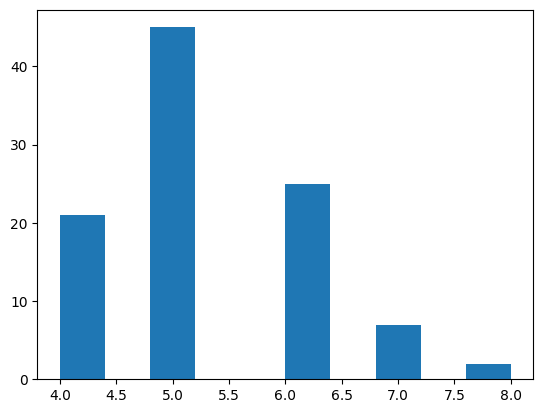

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

N=4
iteracionesTotales = []
for n in range(100):
  stableMarriage(casoAleatorio(N), False, False)

print("Mayor: {}\nMenor: {}\nMedia: {}\n".format(max(iteracionesTotales),min(iteracionesTotales),(sum(iteracionesTotales)/len(iteracionesTotales))))

plt.hist(iteracionesTotales)
plt.show()

Mayor: 118
Menor: 56
Media: 79.85



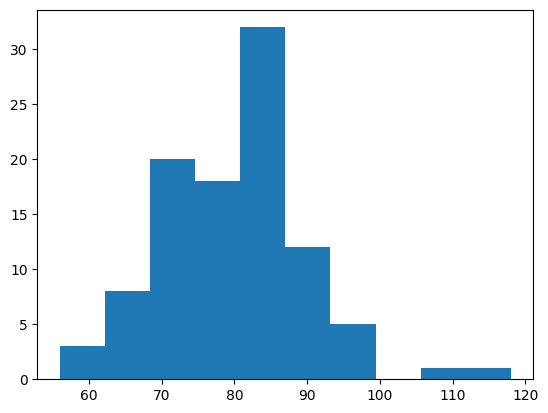

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

N=40
iteracionesTotales = []
for n in range(100):
  stableMarriage(casoAleatorio(N), False, False)

print("Mayor: {}\nMenor: {}\nMedia: {}\n".format(max(iteracionesTotales),min(iteracionesTotales),(sum(iteracionesTotales)/len(iteracionesTotales))))

plt.hist(iteracionesTotales)
plt.show()

Simulate the the Gale-Shapley and Irving algorithms using random preference lists , for n=4 and 40 and generate a gift animation fo the type show in “Illustrating the Deferred Acceptance Algorithm with

In [13]:
from PIL import Image as PillowImage, ImageDraw, ImageFont




def crear_imagen(matriz, wPartner, mFree,name,):
    tamano_imagen = (30 * len(matriz[0]), 30 * len(matriz)+ 20)
    imagen = PillowImage.new("RGB", tamano_imagen, "white")
    draw = ImageDraw.Draw(imagen)

    matriz = [[0] * N for _ in range(N)]
    for i in range(N):
      if wPartner[i]!=-1:
          matriz[i][wPartner[i]-N] = 1

      if mFree[i]==False:
        for j in range(N):
          matriz[j][i] = 2



    # Dibujar cuadrícula y cuadrados negros y rojos
    for i in range(len(matriz)):
        for j in range(len(matriz[0])):
            if matriz[i][j] == 1:
                x = j * 30
                y = i * 30 + 20
                draw.rectangle([(x, y), (x + 30, y + 30)], fill="black")
            if matriz[i][j] == 2:
                x = j * 30
                y = i * 30 + 20
                draw.rectangle([(x, y), (x + 30, y + 30)], fill="red")

    for i in range(len(matriz[0]) + 1):
        x = i * 30
        y = i * 30 + 20
        draw.line([(x, 20), (x, tamano_imagen[1])], fill="black", width=2)
        draw.line([(0, y), (tamano_imagen[0], y)], fill="black", width=2)



    fuente = ImageFont.load_default()
    draw.text((5, 0), "# iteraciones = " + str(name), font=fuente, fill="black")


    imagen.save(str(name) + ".gif")
    imagen.show()




Woman   Man
4 	 3
5 	 0
6 	 2
7 	 1
Numero de iteraciones:  6 



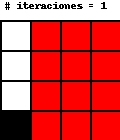

In [14]:
from IPython.display import Image as ColabImage, display

N=4

stableMarriage(casoAleatorio(N),True, True)

imagen_gif = ColabImage(filename="animacion.gif")
display(imagen_gif)

Woman   Man
40 	 39
41 	 21
42 	 25
43 	 15
44 	 24
45 	 2
46 	 31
47 	 16
48 	 27
49 	 3
50 	 14
51 	 32
52 	 37
53 	 7
54 	 18
55 	 10
56 	 19
57 	 6
58 	 26
59 	 11
60 	 1
61 	 28
62 	 4
63 	 38
64 	 12
65 	 9
66 	 36
67 	 23
68 	 8
69 	 33
70 	 5
71 	 30
72 	 35
73 	 29
74 	 13
75 	 22
76 	 0
77 	 17
78 	 34
79 	 20
Numero de iteraciones:  79 



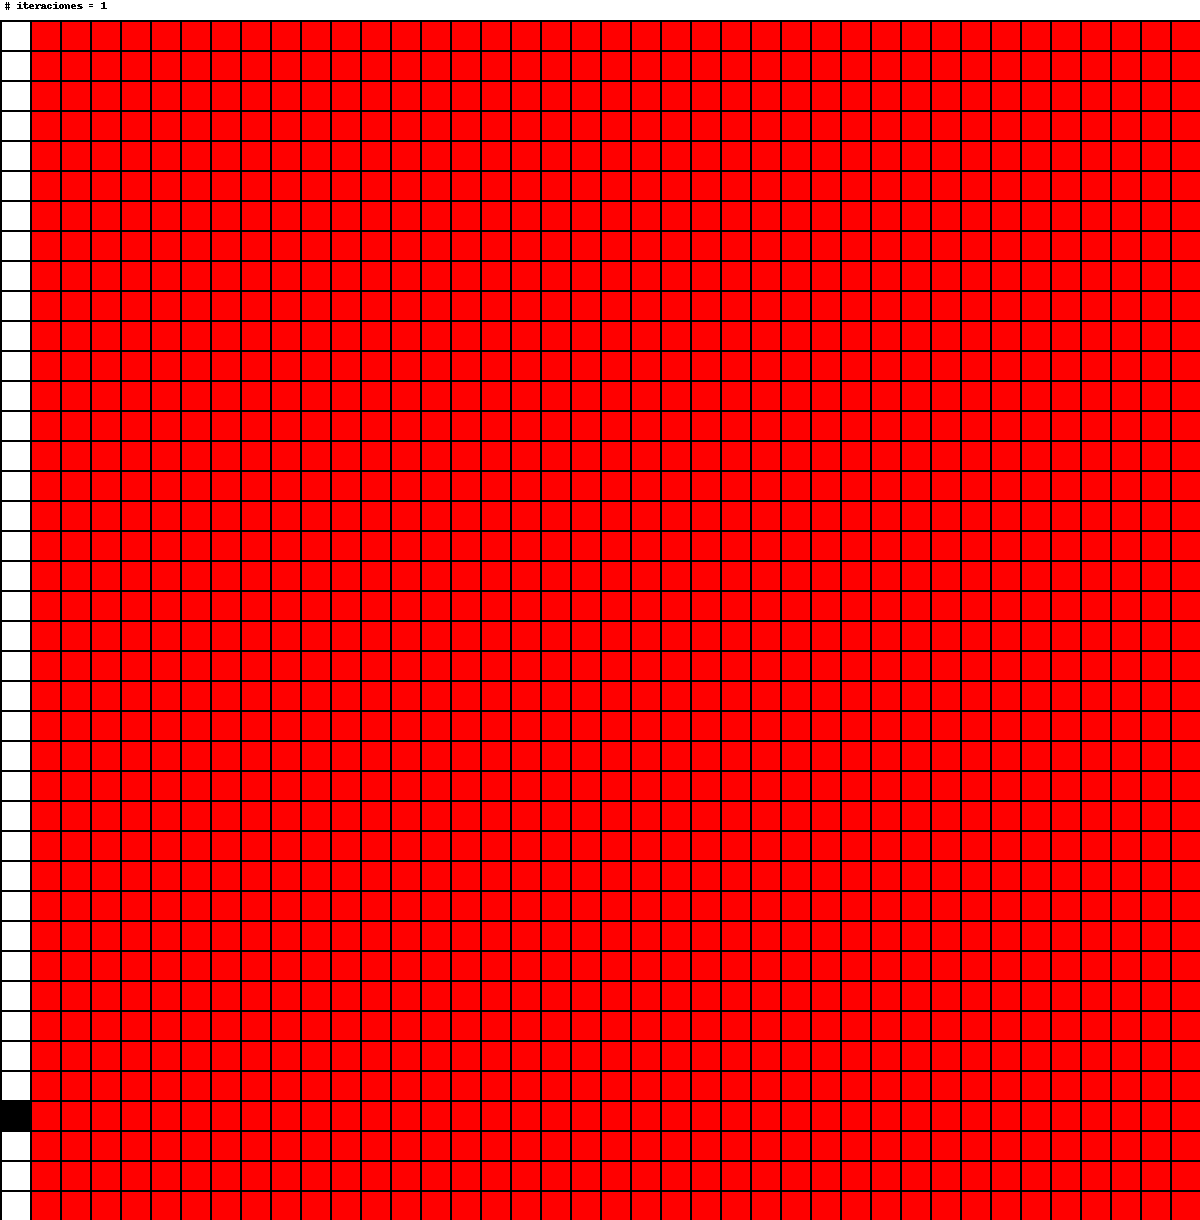

In [15]:
from IPython.display import display, Image

N=40

stableMarriage(casoAleatorio(N),True, True)

imagen_gif = Image(filename="animacion.gif")
display(imagen_gif)